# Ejercicio 1: Introducción a Recuperación de Información

## Objetivo de la práctica
- Entender el problema de **buscar información** en colecciones de texto.
- Comprender por qué se necesita un **índice invertido** en recuperación de información.
- Programar una primera solución manual y luego optimizarla con un índice.
- Evaluar la mejora en tiempos de búsqueda cuando usamos estructuras adecuadas.

## Parte 1: Búsqueda lineal en documentos

### Actividad
1. Se te proporcionará un conjunto de documentos de texto.
2. Escribe una función que:
   - Lea todos los documentos.
   - Busque una palabra ingresada por el usuario.
   - Muestre en qué documentos aparece la palabra.

In [1]:
import os
import time

def seeker(filename, search_word):
    start_time = time.time()
    documents_found = []
    with open('/kaggle/input/dataset/' + filename) as file:
        for line in file:
            if(line.find(search_word) != -1):
                documents_found.append(line)
                
    if(len(documents_found)):
        for document in documents_found:
            print(document)
    else:
        print('Palabra no encontrada')
    end_time = time.time()
    print("Execution time: ", end_time - start_time,"secs")

In [2]:
seeker('01_corpus_turismo.txt', 'aventura')

En Baños de Agua Santa, los turistas disfrutan de deportes de aventura como rafting y canopy.

Execution time:  0.01607489585876465 secs


In [3]:
seeker('01_corpus_turismo_500.txt', 'aventura')

Baños de Agua Santa ofrece deportes de aventura como rafting Un lugar sorprendente para visitar.

Baños de Agua Santa ofrece deportes de aventura como rafting Un lugar famoso para visitar.

Baños de Agua Santa ofrece deportes de aventura como rafting Una experiencia inolvidable.

Baños de Agua Santa ofrece deportes de aventura como rafting Un lugar famoso para visitar.

Baños de Agua Santa ofrece deportes de aventura como rafting Una experiencia inolvidable.

Baños de Agua Santa ofrece deportes de aventura como rafting Perfecto para canopy.

Baños de Agua Santa ofrece deportes de aventura como rafting Ideal para el próximo feriado.

Baños de Agua Santa ofrece deportes de aventura como rafting Perfecto para avistamiento de aves.

Baños de Agua Santa ofrece deportes de aventura como rafting Perfecto para canopy.

Baños de Agua Santa ofrece deportes de aventura como rafting Ideal para el próximo feriado.

Baños de Agua Santa ofrece deportes de aventura como rafting

Baños de Agua Santa of

## Parte 2: Construcción de un índice invertido

### Actividad
1. Escribe un programa que:
   - Recorra todos los documentos.
   - Construya un **índice invertido**, es decir, un diccionario donde:
     - Cada palabra clave apunta a una lista de documentos donde aparece.

2. Escribe una nueva función de búsqueda que:
   - Consulte directamente el índice para encontrar los documentos relevantes.
   - Sea mucho más rápida que la búsqueda lineal.

In [4]:
from collections import defaultdict
import re
import time

inverted_index = defaultdict(set)

def preprocess(text):
    tokens = re.findall(r'\w+', text)
    return set(tokens)

def createInvertedIndex():
    for doc_id, doc_text in enumerate(documents):
        terms = preprocess(doc_text)
        for term in terms:
            inverted_index[term].add(doc_id)

In [5]:
def query(query_text):
    start_time = time.time()
    terms = preprocess(query_text)
    results = set(doc_id for term in terms for doc_id in inverted_index.get(term, []))
    result_docs = [documents[doc_id] for doc_id in results]
    end_time = time.time()
    print("Execution time: ", end_time - start_time,"secs")
    return result_docs

In [6]:
with open('/kaggle/input/dataset/01_corpus_turismo.txt') as file:
    documents = file.readlines()
    inverted_index = defaultdict(set)
    createInvertedIndex()

In [7]:
results = query("aventura")
for result in results:
    print(result)

Execution time:  1.4781951904296875e-05 secs
En Baños de Agua Santa, los turistas disfrutan de deportes de aventura como rafting y canopy.



In [8]:
with open('/kaggle/input/dataset/01_corpus_turismo_500.txt') as file:
    documents = file.readlines()
    inverted_index = defaultdict(set)
    createInvertedIndex()

In [9]:
results500 = query("aventura")
for result in results500:
    print(result)

Execution time:  4.506111145019531e-05 secs
Baños de Agua Santa ofrece deportes de aventura como rafting Perfecto para surf.

Baños de Agua Santa ofrece deportes de aventura como rafting

Baños de Agua Santa ofrece deportes de aventura como rafting Perfecto para senderismo.

Baños de Agua Santa ofrece deportes de aventura como rafting

Baños de Agua Santa ofrece deportes de aventura como rafting Ideal para el próximo feriado.

Baños de Agua Santa ofrece deportes de aventura como rafting

Baños de Agua Santa ofrece deportes de aventura como rafting Un lugar sorprendente para visitar.

Baños de Agua Santa ofrece deportes de aventura como rafting Un lugar famoso para visitar.

Baños de Agua Santa ofrece deportes de aventura como rafting Ideal para el próximo feriado.

Baños de Agua Santa ofrece deportes de aventura como rafting Una experiencia inolvidable.

Baños de Agua Santa ofrece deportes de aventura como rafting Una experiencia inolvidable.

Baños de Agua Santa ofrece deportes de ave

## Parte 3: Evaluación de tiempos de búsqueda
### Actividad

1. Realiza la búsqueda de varias palabras usando:
      -  Corpus pequeño: 16 documentos (turismo en Ecuador).
      -  Corpus grande: 500 documentos (versión ampliada).
2. Mide el tiempo de ejecución:
      -  Para búsqueda lineal.
      -  Para búsqueda usando índice invertido.
      -  Grafica o presenta los resultados en una tabla comparativa.

### Ejemplo de palabras para buscar
- quito
- montañita
- feriado
- playas
- aventura
- galápagos

### Se utiliza import time, para medir el tiempo de ejecución

|                | Lineal pequeño | Lineal grande | Índice invertido pequeño | Índice invertido grande |
|----------------|----------------|---------------|--------------------------|--------------------------|
| quito          | 0.001598358     | 0.003688335   | 1.69E-05                 | 1.72E-05                 |
| montañita      | 0.001371622     | 0.003246546   | 1.45E-05                 | 1.22E-05                 |
| feriado        | 0.002620935     | 0.004029036   | 6.79E-05                 | 6.65E-05                 |
| playas         | 0.001939058     | 0.003304482   | 3.15E-05                 | 3.74E-05                 |
| aventura       | 0.001825571     | 0.002104521   | 3.34E-05                 | 3.65E-05                 |
| galápagos      | 0.001441002     | 0.002883673   | 1.24E-05                 | 1.62E-05                 |
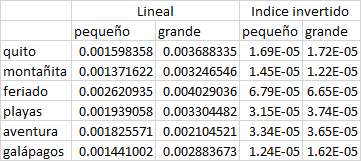
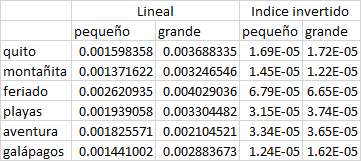
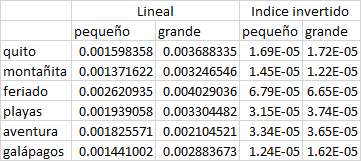
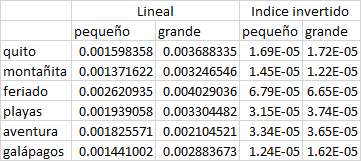

## Parte 4:
### Actividad
1. Modifica el índice para que ignore mayúsculas/minúsculas (por ejemplo, "Playa" y "playa" deben considerarse iguales).
2. Permite consultas de múltiples términos (ejemplo: buscar documentos que contengan "playa" y "turismo").
3. Calcula el _speedup_

In [10]:
def preprocess(text):
    text = text.lower()
    tokens = re.findall(r'\w+', text)
    return set(tokens)

In [11]:
with open('/kaggle/input/dataset/01_corpus_turismo_500.txt') as file:
    documents = file.readlines()
    inverted_index = defaultdict(set)
    createInvertedIndex()

In [12]:
results500 = query("galápagos feriado Aventura")
for result in results500:
    print(result)

Execution time:  6.580352783203125e-05 secs
El Parque Nacional Cajas invita a caminatas entre lagunas Ideal para el próximo feriado.

Mindo es famoso por el avistamiento de aves Ideal para el próximo feriado.

Las Islas Galápagos atraen visitantes por su biodiversidad única Ideal para el próximo feriado.

Quito tiene un centro histórico Patrimonio de la Humanidad Ideal para el próximo feriado.

Las Islas Galápagos atraen visitantes por su biodiversidad única

Las Islas Galápagos atraen visitantes por su biodiversidad única Una experiencia inolvidable.

Las Islas Galápagos atraen visitantes por su biodiversidad única Una experiencia inolvidable.

Durante el feriado, muchos visitan la Amazonía ecuatoriana Perfecto para rafting.

Ecuador es un país megadiverso, ideal para el turismo ecológico Ideal para el próximo feriado.

Las Islas Galápagos atraen visitantes por su biodiversidad única Una experiencia inolvidable.

Mindo es famoso por el avistamiento de aves Ideal para el próximo feriad

## Speedup
El factor SpeedUp mide cómo de efectiva
resulta ser la paralelización de un programa fuente frente a la versión secuencial del
mismo

speedUp = tiempo_secuencial / tiempo_paralelo

Para el ejercicio consideraremos el corpus de 500 documentos y buscando la palabra "feriado"  

Datos obtenidos para realizar los calculos  
Tiempo secuencial: 0.0040290355682373  
Tiempo paralelo: 0.0000665187835693359  
seepud: 60.56989  

El método paralelo es aproximadamente 60 veces más rápido que el método secuencial para realizar la misma tarea.